In [1]:
import tensorflow as tf
from tensorflow  import keras

In [2]:
print("Number of GPUS : ", len(tf.config.experimental.list_physical_devices('GPU')))

Number of GPUS :  0


In [3]:
tf.test.is_built_with_cuda()

False

Importing libraries

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import scipy
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, Activation
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


Function to return array data of our image data for evaluation

In [13]:
# labels = ['PNEUMONIA', 'NORMAL']
# img_size = 150
# def get_data(data_dir):
#     data = [] 
#     for label in labels: 
#         path = os.path.join(data_dir, label)
#         class_num = labels.index(label)
#         for img in os.listdir(path):
#             try:
#                 img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
#                 resized_arr = cv2.resize(img_arr, (img_size, img_size))     # Reshaping images to preferred size
#                 data.append([resized_arr, class_num])
#             except Exception as e:
#                 print(e)
#     return np.array(data)
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150

def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size))     # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)

    images = [item[0] for item in data]
    labels_of_img = [item[1] for item in data]

    return np.array(images), np.array(labels_of_img)


In [14]:
# train = get_data('./chest_xray/chest_xray/train')
# test = get_data('./chest_xray/chest_xray/test')
# val = get_data('./chest_xray/chest_xray/val')
train_images, train_labels = get_data('./chest_xray/chest_xray/train')
test_images, test_labels = get_data('./chest_xray/chest_xray/test')
val_images, val_labels = get_data('./chest_xray/chest_xray/val')


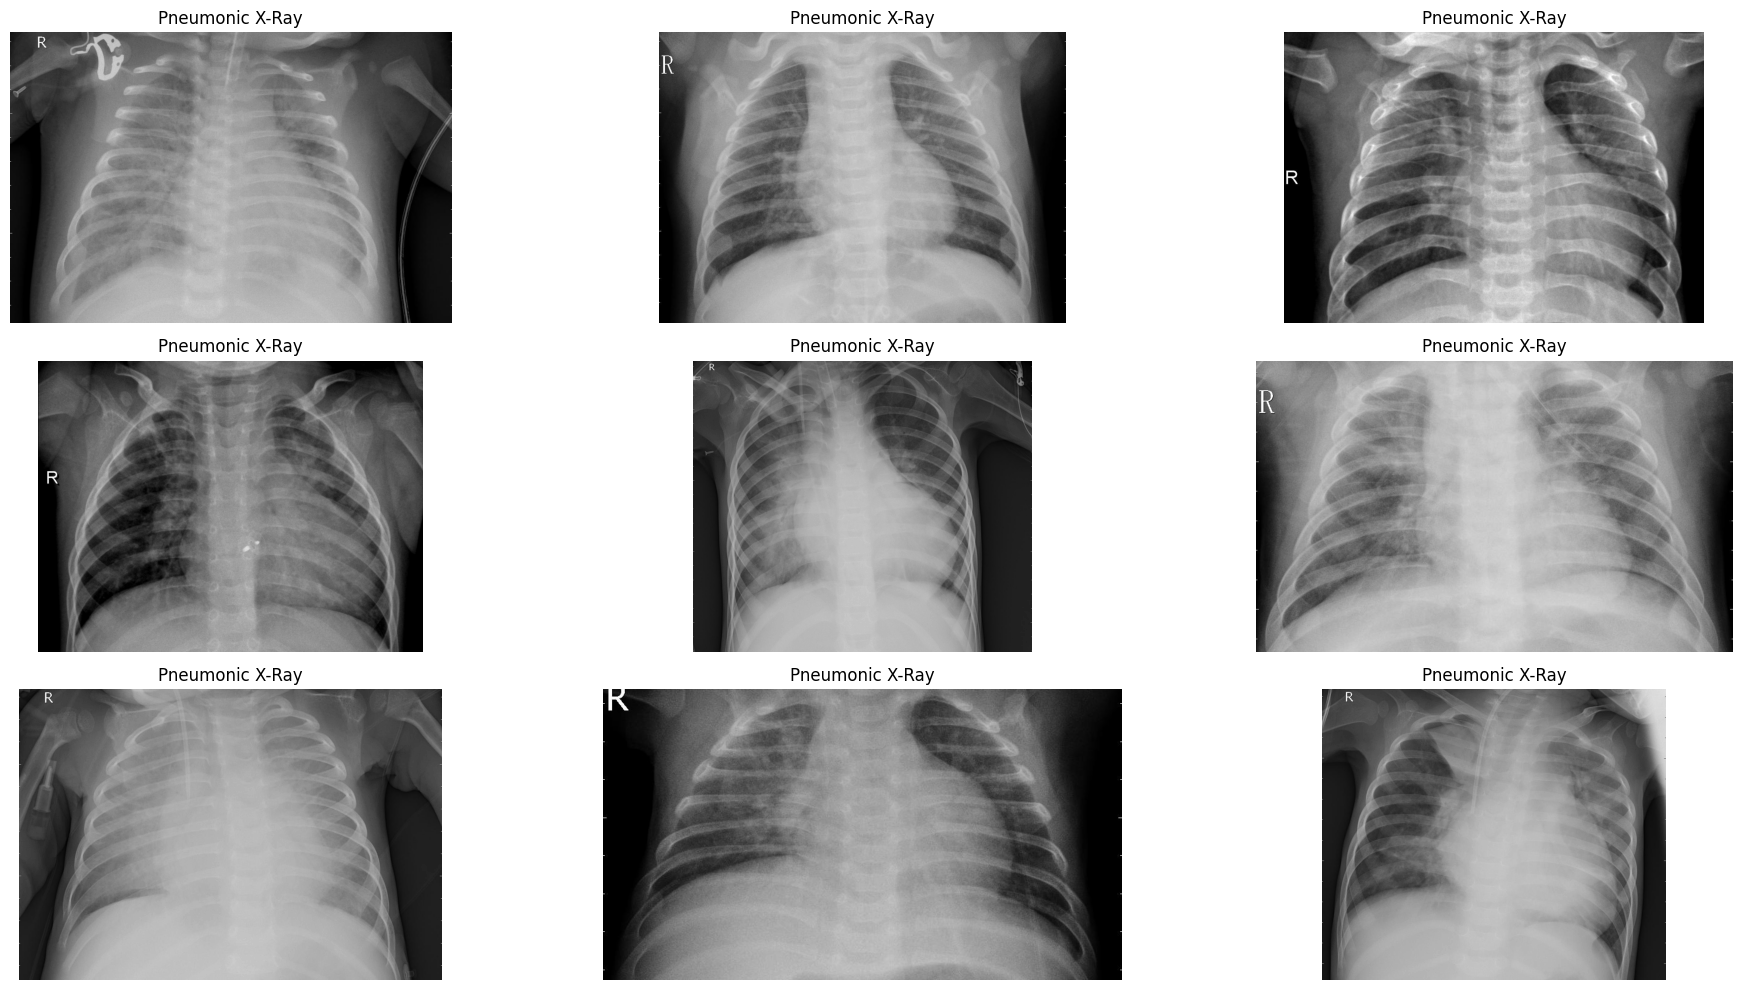

In [15]:
pneumonia = os.listdir("chest_xray/train/PNEUMONIA")
pneumonia_dir = "chest_xray/train/PNEUMONIA"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(pneumonia_dir, pneumonia[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title("Pneumonic X-Ray") 
   
plt.tight_layout()

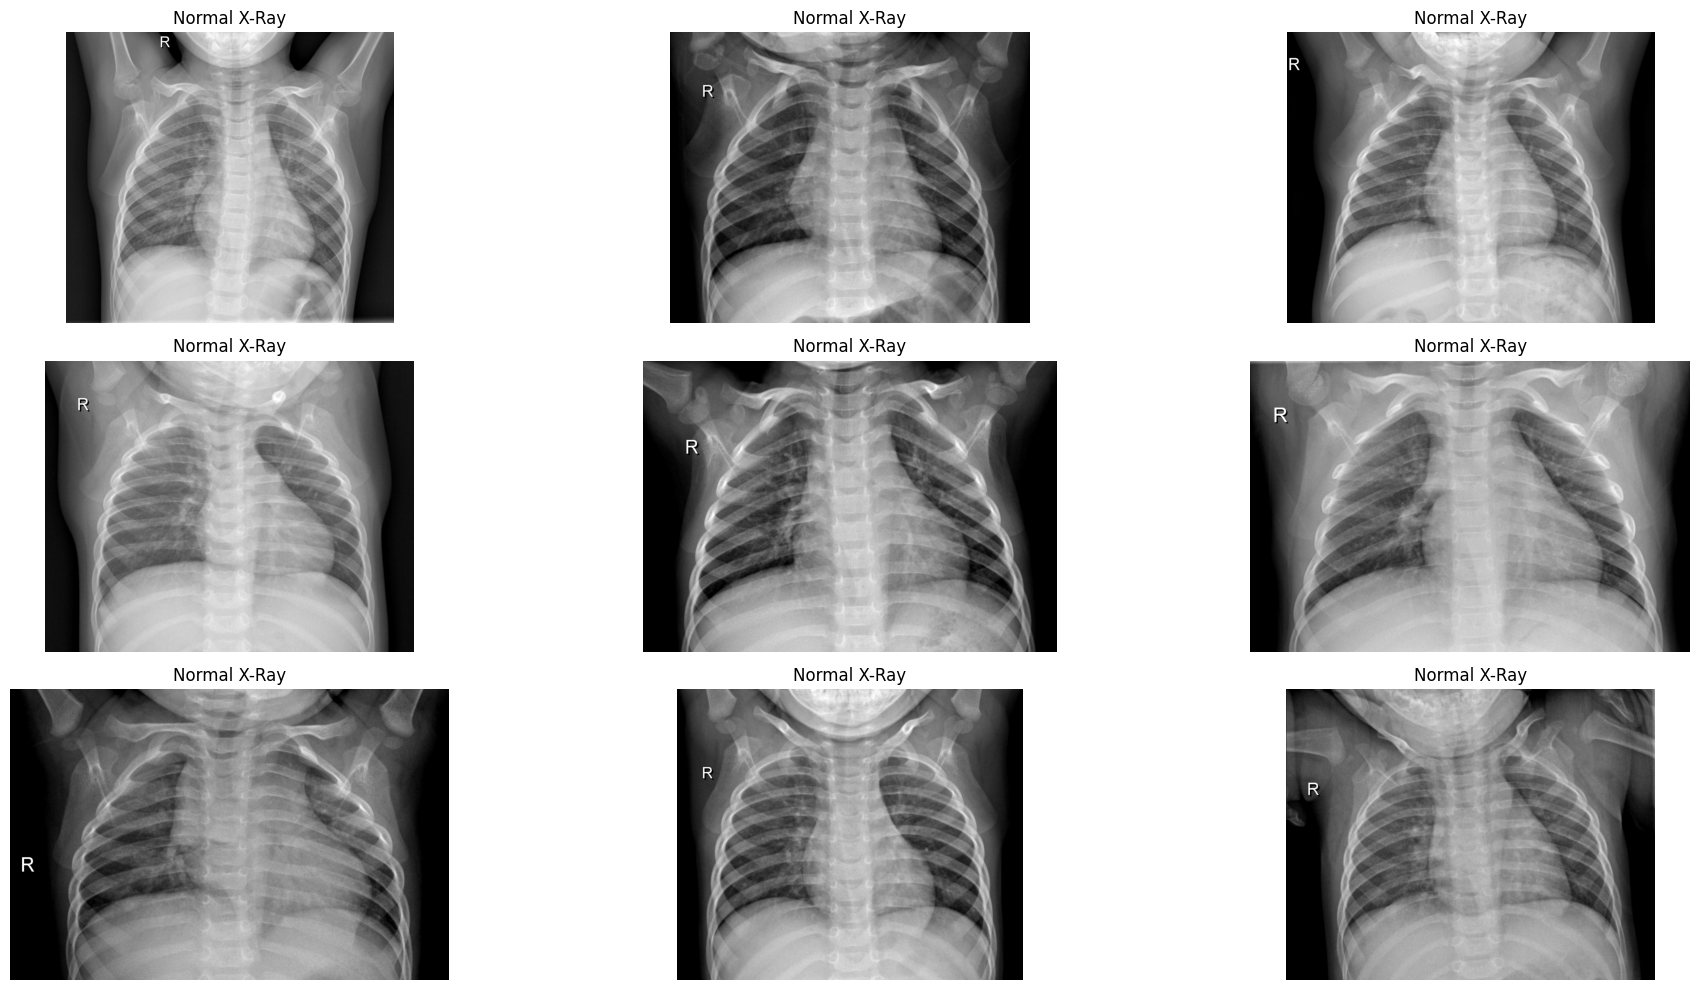

In [16]:
normal = os.listdir("chest_xray/train/NORMAL")
normal_dir = "chest_xray/train/NORMAL"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(normal_dir, normal[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title("Normal X-Ray") 
   
plt.tight_layout()

In [17]:
Path = 'chest_xray/'

Here we are creating labels for corresponding image for the train, test, val dataset

In [33]:
# x_train = []
# y_train = []

# x_test = []
# y_test = []

# x_val = []
# y_val = []

# for feature, label in train:
#   x_train.append(feature)
#   y_train.append(label)

# for feature, label in test:
#   x_test.append(feature)
#   y_test.append(label)

# for feature, label in val:
#   x_val.append(feature)
#   y_val.append(label)

# Assuming you have already modified the get_data function as mentioned in the previous response

# Use unpacking to get the images and labels from the get_data function
x_train, y_train = train_images, train_labels
x_test, y_test = test_images, test_labels
x_val, y_val = val_images, val_labels


In [34]:

print("Number of images in training dataset : {}".format(len(y_train)))
print("Number of images in test dataset : {}".format(len(y_test)))
print("Number of images in validation dataset : {}".format(len(y_val)))

Number of images in training dataset : 5216
Number of images in test dataset : 624
Number of images in validation dataset : 16


Exploring the training dataset to see the number of normal and pneumonic images

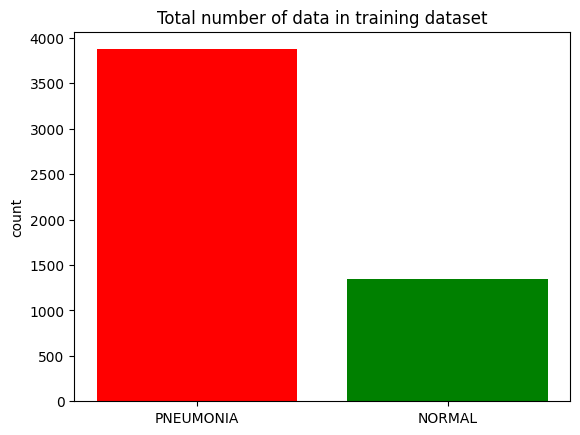

Total: 5216
Pneumonic: 3875
Normal: 1341


In [35]:
positives=[]
negatives=[]

for i in range(len(y_train)):
  if y_train[i]:
    positives.append(x_train[i])
  else:
    negatives.append(x_train[i])



plt.bar(labels,[len(negatives) , len(positives)], color=["red" , "green"])
plt.title("Total number of data in training dataset")
plt.ylabel('count')
plt.show()
print("Total: {}" .format( len(y_train)) )
print("Pneumonic: {}" .format( len(negatives)) )
print("Normal: {}" .format( len(positives)) )

Normalise Dataset

In [36]:
x_train = np.array(x_train)/255
x_val = np.array(x_val)/255
x_test = np.array(x_test)/255

In [37]:
x_train = x_train.reshape(-1,img_size,img_size , 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1,img_size,img_size , 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1,img_size,img_size , 1)
y_test = np.array(y_test)


In [38]:
y_train = y_train.reshape(-1,1)
y_val = y_val.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [39]:
import scipy

Performing image augmentation

In [40]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)

datagen.fit(x_train)

In [41]:
model = Sequential()

model.add(Conv2D(32, (3,3) , strides = 1 , padding = 'same' , activation='relu' , input_shape=(150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding='same'))

model.add(Conv2D(64, (3,3) , strides = 1 , padding = 'same' , activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding='same'))

model.add(Conv2D(64,(3,3) , strides = 1 , padding = 'same' , activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding='same'))

model.add(Conv2D(128,(3,3) , strides = 1 , padding = 'same' , activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding='same'))

model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 150, 150, 32)      320       
                                                                 
 batch_normalization_4 (Bat  (None, 150, 150, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 75, 75, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 dropout_3 (Dropout)         (None, 75, 75, 64)        0         
                                                                 
 batch_normalization_5 (Bat  (None, 75, 75, 64)       

In [42]:
model.compile(optimizer = 'adam' 
              , loss = 'binary_crossentropy' , 
              metrics = ['accuracy'])


In [43]:
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', 
                              factor=0.3,
                              patience=2,
                              min_lr=0.00000001, 
                              verbose=1)

In [47]:
r = model.fit(datagen.flow(x_train , y_train , batch_size=32),epochs = 50, validation_data = (x_val , y_val),callbacks = [reduce_lr])

NameError: name 'scipy' is not defined

In [ ]:
print("Loss of the model on test data = ", model.evaluate(x_test,y_test)[0])
print("Accuracy of the model on test data is = ", model.evaluate(x_test,y_test)[1]*100,"%")

In [ ]:
epochs = list(range(50))
fig , ax = plt.subplots(1,2)
train_acc = r.history['accuracy']
train_loss = r.history['loss']
val_acc = r.history['val_accuracy']
val_loss = r.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs, train_acc , 'go-' ,label='Training Accuracy')
ax[0].plot(epochs, val_acc ,'ro-' , label='Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

ax[1].plot(epochs, train_loss ,'go-' , label='Training Loss')
ax[1].plot(epochs, val_loss ,'ro-' , label='Validation Loss')
ax[1].legend()
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training and Validation Loss')

plt.show()

In [ ]:
preds = model.predict(x_test)
Pneumonic=[]
Normal=[]
for i in range(len(preds)):
  if preds[i]>0.5:
    preds[i]=1
    Pneumonic.append(1);
  else:
    preds[i]=0
    Normal.append(1);

print(len(Pneumonic))
print(len(Normal))


In [ ]:
print(classification_report(y_test, preds, target_names = ['Pneumonic' , 'Normal']))

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

preds = model.predict(x_test)

accuracy = accuracy_score(y_test, np.round(preds))
confusionMatrix = confusion_matrix(y_test, np.round(preds))

tn , fp , fn , tp = confusionMatrix.ravel()

print('\nConfusion Matrix ')
print(confusionMatrix)

print('\nTest Metrics ')
precision = tp/(tp+fp);
recall = tp/(tp+fn)
sensitivity = tn/(tn+fp)

print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(recall+precision)))

print('\nTrain Metric')
print('Train acc: {} %'.format(np.round((r.history['accuracy'][-1])*100,2)))

In [ ]:
cm = pd.DataFrame(confusionMatrix , index = ['0','1'] , columns = ['0','1'])

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)